In [65]:
import pandas as pd # working with tabular data
import pickle # for machine learning models
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization

from sklearn.feature_extraction import DictVectorizer # Machine Learning
from sklearn.linear_model import LinearRegression # Machine Learning
from sklearn.linear_model import Lasso # Regularization
from sklearn.linear_model import Ridge # Regularization

from sklearn.metrics import mean_squared_error # Loss Function

In [66]:
data = pd.read_csv("/workspaces/Mlops/dataset/Coffe_sales.csv")
data.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [67]:
print(data.isna().sum())

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [69]:
X = data.drop(["money", "Month_name", "Weekdaysort"], axis=1)

In [70]:
X['Date'] = pd.to_datetime(X['Date'])
X['Year'] = X['Date'].dt.year
X['Month_names'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day
X = X.drop('Date', axis=1)

In [71]:
y = data['money']

In [72]:
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

In [73]:
X_encoded = pd.get_dummies(X, columns=categorical_cols)

In [74]:
X_encoded.head()

,hour_of_day,Monthsort,Year,Month_names,Day,cash_type_card,coffee_name_Americano,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,...,Time_22:51:02.901000,Time_22:51:25.227000,Time_22:52:58.089000,Time_22:53:06.426000,Time_22:54:19.107000,Time_22:54:32.893000,Time_22:55:39.905000,Time_22:56:23.915000,Time_22:58:20.072000,Time_22:59:18.544000
0,10,3,2024,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12,3,2024,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,3,2024,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13,3,2024,3,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,3,2024,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [76]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [77]:
y_pred=lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.183767695409098


/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


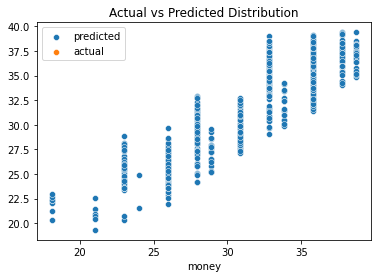

In [78]:
import seaborn as sns

plt.title('Actual vs Predicted Distribution')
sns.scatterplot(x=y_test, y=y_pred, label='predicted')
sns.scatterplot(y_train, label='actual')

plt.legend()

In [80]:
with open('/workspaces/Mlops/models/lin_reg.bin', 'wb') as f_out:
    try:

        pickle.dump((lr,X_encoded,categorical_cols),f_out)
        print("model saved sucsessfully")
    except Exception as e:
        
        print("error in saving the nodel",e)

model saved sucsessfully


In [ ]:
pip install --upgrade typing_extensions

Note: you may need to restart the kernel to use updated packages.


In [81]:
import mlflow

In [88]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")

mlflow.set_experiment("coffe_pred_Exp")

2025/09/05 00:16:50 ERROR mlflow.store.db.utils: SQLAlchemy database error. The following exception is caught.
(sqlite3.OperationalError) no such table: experiments
[SQL: SELECT experiments.experiment_id AS experiments_experiment_id, experiments.name AS experiments_name, experiments.artifact_location AS experiments_artifact_location, experiments.lifecycle_stage AS experiments_lifecycle_stage, experiments.creation_time AS experiments_creation_time, experiments.last_update_time AS experiments_last_update_time 
FROM experiments 
WHERE experiments.name = ? AND experiments.lifecycle_stage IN (?, ?)]
[parameters: ('coffe_pred_Exp', 'active', 'deleted')]
(Background on this error at: https://sqlalche.me/e/14/e3q8)
Traceback (most recent call last):
  File "/home/codespace/anaconda3/lib/python3.9/site-packages/sqlalchemy/engine/base.py", line 1808, in _execute_context
    self.dialect.do_execute(
  File "/home/codespace/anaconda3/lib/python3.9/site-packages/sqlalchemy/engine/default.py", line 

MlflowException: (sqlite3.OperationalError) no such table: experiments
[SQL: SELECT experiments.experiment_id AS experiments_experiment_id, experiments.name AS experiments_name, experiments.artifact_location AS experiments_artifact_location, experiments.lifecycle_stage AS experiments_lifecycle_stage, experiments.creation_time AS experiments_creation_time, experiments.last_update_time AS experiments_last_update_time 
FROM experiments 
WHERE experiments.name = ? AND experiments.lifecycle_stage IN (?, ?)]
[parameters: ('coffe_pred_Exp', 'active', 'deleted')]
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [87]:
with mlflow.start_run():

    mlflow.set_tag("iteration", "1")
    mlflow.log_param("train-data-path","/workspaces/Mlops/dataset/train_paaram_Coffe_sales.csv")
    mlflow.log_param("valid-data-path","/workspaces/Mlops/dataset/valid_paaram_Coffe_sales.csv")

    # set hyper parameter for Lasso
    alpha = 0.01
    mlflow.log_param("alpha", alpha)
    lr = Lasso(alpha = alpha)
    
    # train the model
    lr.fit(X_train, y_train)

    # get the y_pred from X_train
    y_pred = lr.predict(X_test)

    # calculate the mean squared error
    rmse=mean_squared_error(y_test, y_pred, squared=False)
    print(f"RMSE: {rmse}")

    mlflow.log_metric("rmse", rmse)

2025/09/05 00:16:09 ERROR mlflow.store.db.utils: SQLAlchemy database error. The following exception is caught.
(sqlite3.OperationalError) no such table: experiments
[SQL: SELECT experiments.experiment_id AS experiments_experiment_id, experiments.name AS experiments_name, experiments.artifact_location AS experiments_artifact_location, experiments.lifecycle_stage AS experiments_lifecycle_stage, experiments.creation_time AS experiments_creation_time, experiments.last_update_time AS experiments_last_update_time 
FROM experiments 
WHERE experiments.experiment_id = ? AND experiments.lifecycle_stage IN (?, ?)]
[parameters: ('1', 'active', 'deleted')]
(Background on this error at: https://sqlalche.me/e/14/e3q8)
Traceback (most recent call last):
  File "/home/codespace/anaconda3/lib/python3.9/site-packages/sqlalchemy/engine/base.py", line 1808, in _execute_context
    self.dialect.do_execute(
  File "/home/codespace/anaconda3/lib/python3.9/site-packages/sqlalchemy/engine/default.py", line 732,

MlflowException: (sqlite3.OperationalError) no such table: experiments
[SQL: SELECT experiments.experiment_id AS experiments_experiment_id, experiments.name AS experiments_name, experiments.artifact_location AS experiments_artifact_location, experiments.lifecycle_stage AS experiments_lifecycle_stage, experiments.creation_time AS experiments_creation_time, experiments.last_update_time AS experiments_last_update_time 
FROM experiments 
WHERE experiments.experiment_id = ? AND experiments.lifecycle_stage IN (?, ?)]
[parameters: ('1', 'active', 'deleted')]
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [ ]:
!pip install hyperopt

     |████████████████████████████████| 1.6 MB 28.7 MB/s eta 0:00:01
     |████████████████████████████████| 203 kB 119.7 MB/s eta 0:00:01


In [84]:
import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_test, label=y_test)


In [85]:

def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50
        )
        y_pred = booster.predict(valid)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)

    return {'loss': rmse, 'status': STATUS_OK}

In [86]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 4, 20, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:linear',
    'seed': 42
}

best_result = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=5,
    trials=Trials()
)


  0%|          | 0/5 [00:00<?, ?trial/s, best loss=?]

2025/09/05 00:14:01 ERROR mlflow.store.db.utils: SQLAlchemy database error. The following exception is caught.
(sqlite3.OperationalError) no such table: experiments
[SQL: SELECT experiments.experiment_id AS experiments_experiment_id, experiments.name AS experiments_name, experiments.artifact_location AS experiments_artifact_location, experiments.lifecycle_stage AS experiments_lifecycle_stage, experiments.creation_time AS experiments_creation_time, experiments.last_update_time AS experiments_last_update_time 
FROM experiments 
WHERE experiments.experiment_id = ? AND experiments.lifecycle_stage IN (?, ?)]
[parameters: ('1', 'active', 'deleted')]
(Background on this error at: https://sqlalche.me/e/14/e3q8)
Traceback (most recent call last):
  File "/home/codespace/anaconda3/lib/python3.9/site-packages/sqlalchemy/engine/base.py", line 1808, in _execute_context
    self.dialect.do_execute(
  File "/home/codespace/anaconda3/lib/python3.9/site-packages/sqlalchemy/engine/default.py", line 732,

  0%|          | 0/5 [00:00<?, ?trial/s, best loss=?]


MlflowException: (sqlite3.OperationalError) no such table: experiments
[SQL: SELECT experiments.experiment_id AS experiments_experiment_id, experiments.name AS experiments_name, experiments.artifact_location AS experiments_artifact_location, experiments.lifecycle_stage AS experiments_lifecycle_stage, experiments.creation_time AS experiments_creation_time, experiments.last_update_time AS experiments_last_update_time 
FROM experiments 
WHERE experiments.experiment_id = ? AND experiments.lifecycle_stage IN (?, ?)]
[parameters: ('1', 'active', 'deleted')]
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [ ]:
logged_model='models:/m-9afd61cb03004b7e98a890a553400eb7'
load_model=mlflow.xgboost.load_model(logged_model)
load_model

In [ ]:
test = xgb.DMatrix(X_test, label=y_test)

In [ ]:
load_model.predict(test)

array([33.18899 , 35.692303, 35.755913, 35.630585, 18.19972 , 35.69512 ,
       22.917994, 35.63832 , 26.010864, 30.963657, 23.261194, 37.65605 ,
       35.70168 , 35.730827, 35.69512 , 35.714993, 28.089231, 35.714993,
       35.692303, 22.917994, 35.70168 , 26.272633, 35.714993, 32.985203,
       35.69585 , 30.963657, 37.79872 , 28.926477, 33.12644 , 28.12116 ,
       35.63832 , 28.721434, 35.836033, 26.013126, 35.70168 , 28.334013,
       33.248844, 37.97403 , 37.629326, 28.30851 , 30.963657, 35.714993,
       35.801056, 33.270123, 35.69585 , 35.692303, 37.65605 , 26.013126,
       35.630585, 30.857641, 28.933495, 35.714993, 28.060425, 35.692303,
       35.730827, 35.692303, 30.857641, 23.253126, 30.860458, 30.933773,
       35.755913, 18.387068, 35.69512 , 32.844288, 35.730827, 35.692303,
       26.013126, 38.000755, 33.103416, 28.144495, 35.836033, 33.103416,
       35.70168 , 33.18899 , 28.12116 , 38.081886, 32.982723, 28.144495,
       37.629326, 38.081886, 26.010864, 29.112286, 

In [ ]:
mlflow.xgboost.autolog(disable=True)

with mlflow.start_run():
        # Hyperparameter for run 09923bbad64045ca837a1656254ce756
        params = {
            'max_depth': 4,
            'learning_rate': 0.14493221791716185,
            'reg_alpha': 0.012153110171030913,
            'reg_lambda': 0.017881159785939696,
            'min_child_weight': 0.674864917045824,
            'objective': 'reg:linear',
            'seed': 42
        }

        mlflow.log_params(params)
        

        booster = xgb.train(
                    params=params,
                    dtrain=train,
                    num_boost_round=1000,
                    evals=[(valid, 'validation')],
                    early_stopping_rounds=5
                )

        # get the y_pred from X_train
        y_pred = booster.predict(valid)

        # get RMSE and record on mlflow
        rmse = round(mean_squared_error(y_test, y_pred, squared=False),2)
        print("RMSE for training data:", rmse)
        mlflow.log_metric("rmse", rmse)

        # log xgboost model to mlflow
        mlflow.xgboost.log_model(booster, artifact_path="models_mlflow")

        # log the preprocessor DictVectorizer
        with open("models/preprocessor.bin", "wb") as f_out:
            pickle.dump(dv, f_out)
        
        mlflow.log_artifact("models/preprocessor.bin", artifact_path="preprocessor")

[0]	validation-rmse:4.17953


[1]	validation-rmse:3.67235
[2]	validation-rmse:3.25134


/home/codespace/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:45:08] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[3]	validation-rmse:2.90779
[4]	validation-rmse:2.62472
[5]	validation-rmse:2.39102
[6]	validation-rmse:2.19245
[7]	validation-rmse:1.96855
[8]	validation-rmse:1.79118
[9]	validation-rmse:1.64943
[10]	validation-rmse:1.48835
[11]	validation-rmse:1.38203
[12]	validation-rmse:1.26108
[13]	validation-rmse:1.15882
[14]	validation-rmse:1.07787
[15]	validation-rmse:0.99059
[16]	validation-rmse:0.93044
[17]	validation-rmse:0.84662
[18]	validation-rmse:0.77958
[19]	validation-rmse:0.73112
[20]	validation-rmse:0.68281
[21]	validation-rmse:0.65461
[22]	validation-rmse:0.61221
[23]	validation-rmse:0.58273
[24]	validation-rmse:0.56107
[25]	validation-rmse:0.54290
[26]	validation-rmse:0.53225
[27]	validation-rmse:0.50547
[28]	validation-rmse:0.49571
[29]	validation-rmse:0.48858
[30]	validation-rmse:0.47499
[31]	validation-rmse:0.47502
[32]	validation-rmse:0.47504
[33]	validation-rmse:0.46986
[34]	validation-rmse:0.45809
[35]	validation-rmse:0.45811
[36]	validation-rmse:0.45812
[37]	validation-rmse:

2025/09/04 22:45:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


RMSE for training data: 0.43


/home/codespace/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:45:12] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2025/09/04 22:45:15 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpv9y5y1g9/model, flavor: xgboost). Fall back to return ['xgboost==2.1.4']. Set logging level to DEBUG to see the full traceback. 
2025/09/04 22:45:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


NameError: name 'dv' is not defined

In [ ]:
!pip install --upgrade mlflow

In [ ]:
from mlflow.tracking import MlflowClient

# instantiate the client
MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"
client = MlflowClient(tracking_uri=MLFLOW_TRACKING_URI)

# create experiment
client.create_experiment(name="xgbtest_1")

# list experiments
experiments = client.search_experiments()
for exp in experiments:
    print(exp)

<Experiment: artifact_location='/workspaces/Mlops/mlruns/5', creation_time=1757028455821, experiment_id='5', last_update_time=1757028455821, lifecycle_stage='active', name='xgbtest_1', tags={}>
<Experiment: artifact_location='/workspaces/Mlops/mlruns/4', creation_time=1757028394028, experiment_id='4', last_update_time=1757028394028, lifecycle_stage='active', name='xgbtest_exp', tags={}>
<Experiment: artifact_location='/workspaces/Mlops/mlruns/3', creation_time=1757028354864, experiment_id='3', last_update_time=1757028354864, lifecycle_stage='active', name='xgbtest', tags={}>
<Experiment: artifact_location='/workspaces/Mlops/mlruns/2', creation_time=1757028272549, experiment_id='2', last_update_time=1757028272549, lifecycle_stage='active', name='test', tags={}>
<Experiment: artifact_location='/workspaces/Mlops/mlruns/1', creation_time=1757019503220, experiment_id='1', last_update_time=1757019503220, lifecycle_stage='active', name='coffe_pred_Exp_1', tags={}>
<Experiment: artifact_locati